# Исследование объявлений о продаже квартир

Импорт модулей
(Импортируем модули которые пригодятся нам в работе)

In [1]:
import astf
import math
import warnings
import sys


import pandas as pd
import numpy as np

    
# импортируем графические модули
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

причитаем исходный файл для первичного понимания что-же нам попало в руки.
Начнем вообще с исследования данных: сколько строк, сколько NaN, как данные распределенны по столбцам, какие столбцы с уникальными значениями а в каких очень большой разброс, посмотрим наличие дубликатов.

Все текстовые столбики привидем к нижнему регистру несмотря, что в одном находятся название городов. Пока мы будем работать с этими данными это точно лишнем не будет. а уже потом на итоговой презентации наверное стоит вернуть тому же Санкт-Петербургу его величие)

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
print(df.head())

  building_series_id  total_images  last_price  total_area  \
0            1564812            20  13000000.0       108.0   
1                NaN             7   3350000.0        40.4   
2         Сталинский            10   5196000.0        56.0   
3                NaN             0  64900000.0       159.0   
4                NaN             2  10000000.0       100.0   

  first_day_exposition  rooms  ceiling_height  floors_total  living_area  \
0  2019-03-07T00:00:00      3            2.70          16.0         51.0   
1  2018-12-04T00:00:00      1             NaN          11.0         18.6   
2  2015-08-20T00:00:00      2             NaN           5.0         34.3   
3  2015-07-24T00:00:00      3             NaN          14.0          NaN   
4  2018-06-19T00:00:00      2            3.03          14.0         32.0   

   floor  ... kitchen_area  balcony    locality_name  airports_nearest  \
0      8  ...         25.0      NaN  Санкт-Петербург           18863.0   
1      1  ...         

Видим, что столцов достаточно много. Тем то лучше больше данных для проработки и постороения разных зависимостей.

# Очистка данных


### Исследование
Посмотрим с чем имеем дело в области типов и количества данных

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

In [4]:
print(df.isnull().sum())

building_series_id      17182
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
area                        0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


#### `building_series_id`

In [5]:
df['building_series_id'].value_counts().head(20)

1564812.0       2807
1564812          998
1564792.0        374
1564801.0        311
1564806.0        175
1568627.0        144
1564792          133
1569071.0        133
1564796.0        116
1564801           92
1569033.0         87
1564806           67
1569038.0         62
Кирпичный         60
1568627           52
Кирп.Монолит      47
1569066.0         46
1564796           44
1569071           40
1568734.0         37
Name: building_series_id, dtype: int64

In [6]:
print(df['building_series_id'].unique())

['1564812' nan 'Сталинский' '1568627.0' '1564812.0' '1568643.0'
 '1564806.0' '1564796.0' '1569038.0' '1564801.0' '1564801' '1569071.0'
 '1564792' 'Панельный' '1569071' '1564792.0' '1569054.0' '1569033.0' '504'
 '1569066' '600.11 серия' '1568690.0' '1564806' '712041.0' 'Брежневка'
 '1568627' '1568663.0' 'Старый фонд с КР' '1568734.0' '137 серия'
 'сталинский' '712041' '1569066.0' 'Хрущевка' '600' '1569033' '1568675.0'
 'Кирпичный монолит' '1564796' 'Индивидуальный' 'старый фонд'
 'кирп.монолит' 'Кирпичный' '1568663' 'Старый фонд' '1568658'
 'Кирп.Монолит' '1569075.0' '1568658.0' '7' '1569038' '1569054'
 '1569061.0' '121 (Гатчинская)' '1568675' '602 серия' '1 ЛГ - 600.11'
 '137' '606 серия' '1569088.0' '1569048.0' '100' '1568643' '1569041.0'
 '121' '1569079.0' '1569041' 'хрущевка' 'Блочный'
 'старый фонд + капремонт' 'монолит' 'кирпичный' '1ЛГ-502'
 '121(Гатчинская)' 'II-18/9' '13' '1568653' '1-528 КП - 2' '1569088'
 '504 серия' 'брежневка' 'Монол.Панельный' 'Корабль' '1568653.0'
 '121 г

`building_series_id` 

Интересная колонка. Так как это id, то мы не знаем точное название типов этих домов но мы знаем, что это категория которая объединяет очень важные параметры характеристик недвижимости. По этим категориям стоит заполнять усреднеными данными такие параметры как высота потолков, площадь квартиры, кол-во балконов...

Для значений NaN в этом стоблике заполним значением 'unknown'

In [7]:
df['building_series_id'] = df['building_series_id'].fillna('unknown')
#df['building_series_id'] = df['building_series_id'].replace('1564812', '1564812.0')

#### `is_apartment` 

Привидем колонку к типу булево

Очень большая цифра отсутсвующих значений.В России жилье в виде апартов совсем не в почете. Более правильным решением все значения NaN обозначить как False.


In [8]:
print(df['is_apartment'].unique())

[nan False True]


In [9]:
df['is_apartment'] = df['is_apartment'].fillna('False')
df['is_apartment'] = df['is_apartment'].map({'False':False, 'True':True})
df['is_apartment'] = df['is_apartment'].astype('bool')

#### `ceiling_height` `floors_total` `living_area` `kitchen_area` `balcony`

Все нулы по этим столбикам я заполню медианой по категориям в зависимости от типа дома.
Для этого напишем процедуру которая будет делить фрейм по группам и заполнять медианой

In [10]:
#Укрупним данные если у нас меньше 5 домов одного типа я отношу их к самой большой группе 'Unknown'

def set_unknown_id_type_less_5 ():
    
    for name, group_df in df.groupby('building_series_id'):
        x = len(group_df)
        if x < 5:
            df['building_series_id'] = df.loc[df['building_series_id'] == str(name)].fillna('unknown') 

In [11]:
def fill_nan_of_id_seria(name_column, round_dec = False):
    
    # Так как в большинстве случаев с мелкими сериями у нас данных даже на медиану не хватает 
    # то берем за идеал медиану самой большой группы "Unknown"
    
    # Вторым параметром используем округление, оно понадобится для таких колонок как 'балконы' или 'этаж'
    
    i = df.loc[df['building_series_id'] == 'unknown'][name_column].median()
    
    for name, group_df in df.groupby('building_series_id'):
        x = group_df[name_column].median() 
        if math.isnan(x): x = i
        if round_dec: x = round(x)
        mask = (df['building_series_id']==str(name))
        try: df.loc[mask, name_column] = df.loc[mask, name_column].fillna(x) 
        except: print('any problem! for group ', name)


In [12]:
with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        fill_nan_of_id_seria('ceiling_height')
        fill_nan_of_id_seria('living_area')
        fill_nan_of_id_seria('floors_total', True)
        fill_nan_of_id_seria('kitchen_area')
        fill_nan_of_id_seria('balcony', True)
        
# Сделал исключение в выводе ошибки для некоторых групп в которых все данные nan и не может рассчитать медиану.
# Мы этот момент предусмотрели так, что строка без данных не останется а вот вывод с nan уберем в угоду производтельности

Проверим Null по нашим категориям

In [13]:
print(df.isnull().sum())

building_series_id          0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
area                        0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Мы избавились от null в тех строках которые касались характеристики квартиры

### Попробуем найти аномалии в данных

Потолки больше 10 метров наверное эксклюзив который бывает только в переделанных цехах
Найдем всё, что больше 10 метров и заменим медианной из всего массива.

In [14]:
anomal_ceiling = df.query('ceiling_height > 3')
print(anomal_ceiling['ceiling_height'].value_counts())

3.20     278
3.10     215
3.30     141
3.50     130
3.40      93
3.15      57
3.05      46
4.00      39
3.60      36
3.25      36
3.70      30
3.80      20
3.11      20
3.55      18
3.12      17
3.35      16
3.90      14
3.08      14
3.06      11
3.18      11
3.07      11
3.13      11
3.33      10
4.20      10
3.45       9
3.02       8
3.38       8
27.00      8
3.75       8
3.95       8
        ... 
3.88       1
3.84       1
3.39       1
5.00       1
3.93       1
5.80       1
4.14       1
3.58       1
3.98       1
3.68       1
3.83       1
10.30      1
5.60       1
4.80       1
4.37       1
4.15       1
3.48       1
3.69       1
5.20       1
3.82       1
4.65       1
3.29       1
3.42       1
3.44       1
3.59       1
8.30       1
4.30       1
22.60      1
3.87       1
3.76       1
Name: ceiling_height, Length: 119, dtype: int64


Отлично! потолки больше 10 метров это слишком.. Количества таких выбросов меньше чем 0.2%

In [15]:
#x = df.loc[df['building_series_id'] == 'unknown']['ceiling_height'].median()
x = df['ceiling_height'].median()
mask = (df['ceiling_height'] > 4)
df.loc[mask, 'ceiling_height'] = df.loc[mask, 'ceiling_height'].fillna(x)

### Проверим жилую площадь

In [16]:
#print(df['living_area'].sort_values(ascending=False).head())
#print(df['living_area'].sort_values(ascending=True).head())

print(df['living_area'].describe())

count    23699.000000
mean        34.140059
std         21.160356
min          2.000000
25%         19.000000
50%         29.900000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64


In [17]:
print(df['kitchen_area'].sort_values(ascending=False).value_counts(ascending=False).head())

9.4     1955
6.0     1322
10.0    1285
8.0     1118
9.0     1114
Name: kitchen_area, dtype: int64


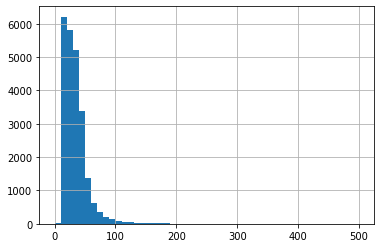

In [18]:
df['living_area'].hist(bins=50,range = (0, 500))

Я пока не буду ничего делать с жилой площадью в 2 кв.м. Я если честно этому никак не удивелен. Мне кажется этот параметр надо проверить сложив всю площадь квартиры. Да и график прямо Пуассон)

In [19]:
df_total = df.pivot_table(index = 'building_series_id', values = ['living_area','kitchen_area']).reset_index()
df_total['total_area'] = df_total['living_area'] + df_total['kitchen_area']
print(df_total.sort_values('total_area', ascending=True).head(20))
print(df_total.sort_values('total_area', ascending=False).head(20))

    building_series_id  kitchen_area  living_area  total_area
99   Кирпичный монолит      2.000000    18.000000   20.000000
86             II-18/9      6.300000    14.000000   20.300000
3          1-528-КП-97      5.500000    16.500000   22.000000
2         1-528 КП - 2      5.700000    17.800000   23.500000
82            663278.0      6.000000    18.000000   24.000000
4           1-ЛГ-600-I      8.300000    15.800000   24.100000
75                504Д      7.200000    17.500000   24.700000
54             1569048      5.396667    20.716667   26.113333
55           1569048.0      5.344444    20.855556   26.200000
66           1569079.0      7.090000    19.800000   26.890000
44           1568708.0      5.435000    22.650000   28.085000
11     121(гатчинская)      9.400000    20.000000   29.400000
103               ОД-6      6.900000    22.800000   29.700000
36             1568663      5.500000    25.250000   30.750000
94            Индивид.      7.000000    24.000000   31.000000
90      

как и требовалось доказать: Квартира в 20 кв. м. вполне себе существующая недвижимость

### Проверим количество этажей в доме

In [20]:
print(df['floors_total'].sort_values(ascending=False).value_counts(ascending=False))

5.0     5788
9.0     3841
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      396
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
52.0       1
37.0       1
33.0       1
29.0       1
60.0       1
Name: floors_total, dtype: int64


Я бы конечно усомнился 60 этажам, но теперь есть "лахта центр" и хоть полная этажность этаго здания 88 этажей. Я оставлю эту цифру как представителя небоскреба

### 'balcony'

In [21]:
print(df['balcony'].sort_values(ascending=False).value_counts(ascending=False))

1.0    15126
2.0     4243
0.0     3761
5.0      304
4.0      184
3.0       81
Name: balcony, dtype: int64


с балконами на мой взгляд тоже все в порядке

Тут мы закончим исправление раздела по характеристикам недвижимости. и приступим к гкографической удаленности от объектов

#### `airports_nearest', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'` `cityCenters_nearest` `parks_around3000`

Мои мысли после просмотра колонок таблицы наводят меня на вот такое решение этой проблемы.
У нас есть один объдиняющий географический столбик - это "название местрости" или 'locality_name'. Исходя из того, что наш датафрейм не содержит точных адресов а только название населенного пункта, то и усредненные значения для городов вполне себе норма в пределах тех точностей с котороыми мы работаем в этом дата фрейме.

Что то мне подсказывает, что будут ситуации когда у какой то деревни вообще не будет данных или у нас есть null в поле "название местности" и даже среднию заполнить будет нечем. Что же, на мой взгляд значение null это тоже значение и тут подходит как нельзя лучше. Я не знаю какое растояние от некой деревни до аэропорта (а аэропортов не много - один!). Оставим этим строкам значение null и программа не будет учитывать их в графиках или будем удалять в собранных датафремах функцией dropna()
приступим...

airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589

Проверим а, что вообще есть в столбике "населенные пункты"

In [22]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [23]:
df['locality_name'].value_counts().head(20)

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Ломоносов                    133
Кириши                       125
Сланцы                       112
Волхов                       111
Name: locality_name, dtype: int64

Вспомним, что в этом столбике 49 nan. Это меньше одного процента так, что откиним их к самой болшой группе - "Санкт-Петербург"

In [24]:
df['locality_name'] = df['locality_name'].fillna('Санкт-Петербург')

Напишим процедуру в которой будем подкидывать средние значение

* airports_nearest         5542
* cityCenters_nearest      5519
* parks_around3000         5518
* parks_nearest           15620
* ponds_around3000         5518
* ponds_nearest           14589

In [25]:
def seporate_area_located(name_column, round_dec = False):
    
     for name, group_df in df.groupby('locality_name'):
        
        if name_column == 'parks_around3000' or name_column == 'ponds_around3000':
            x = group_df[name_column].median()
            x = round(x)
        else:    
            x = group_df[name_column].mean()
        
        if math.isnan(x): 
            continue
        
        mask = (df['locality_name']==str(name))
        try: df.loc[mask, name_column] = df.loc[mask, name_column].fillna(x) 
        except: print('any problem! for group ', name)

In [26]:
with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        seporate_area_located('airports_nearest')
        seporate_area_located('cityCenters_nearest')
        seporate_area_located('parks_around3000', True)
        seporate_area_located('parks_nearest')
        seporate_area_located('ponds_around3000', True)
        seporate_area_located('ponds_nearest')

In [27]:
print(df.isnull().sum())

building_series_id         0
total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
area                       0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5386
cityCenters_nearest     5386
parks_around3000        5386
parks_nearest           5998
ponds_around3000        5386
ponds_nearest           5494
days_exposition         3181
dtype: int64


Посмотрим что там не так

count    18313.000000
mean     28869.405275
std      12670.379600
min          0.000000
25%      18641.000000
50%      26862.000000
75%      37313.000000
max      84869.000000
Name: airports_nearest, dtype: float64


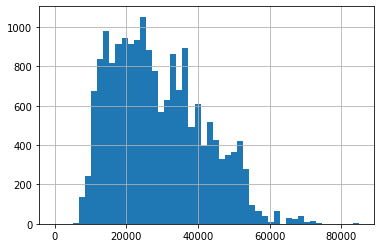

In [28]:
df['airports_nearest'].hist(bins = 50)
print(df['airports_nearest'].describe())

count    18313.000000
mean     14228.469229
std       8624.812736
min        181.000000
25%       9274.000000
50%      13095.000000
75%      16319.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


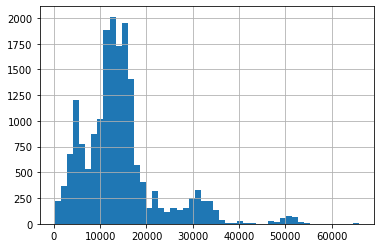

In [29]:
df['cityCenters_nearest'].hist(bins = 50)
print(df['cityCenters_nearest'].describe())

count    17701.000000
mean       492.223921
std        231.894950
min          1.000000
25%        447.000000
50%        498.552952
75%        498.552952
max       3190.000000
Name: parks_nearest, dtype: float64


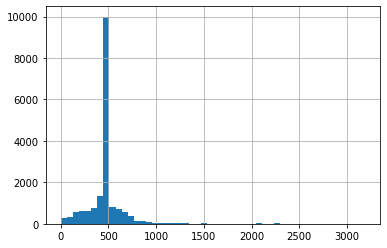

In [30]:
df['parks_nearest'].hist(bins = 50)
print(df['parks_nearest'].describe())

count    18205.000000
mean       519.304807
std        197.931241
min         13.000000
25%        477.000000
50%        520.117383
75%        561.000000
max       1344.000000
Name: ponds_nearest, dtype: float64


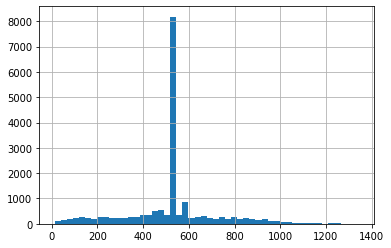

In [31]:
df['ponds_nearest'].hist(bins = 50)
print(df['ponds_nearest'].describe())

In [32]:
df['locality_name'].value_counts().head(20)

Санкт-Петербург            15770
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Ломоносов                    133
Кириши                       125
Сланцы                       112
Волхов                       111
Name: locality_name, dtype: int64

приведем время к формату дата - ничего не потеряем но восприятие улучшится

In [33]:
print(df['first_day_exposition'].value_counts().head(10))

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
2018-07-10T00:00:00     93
2017-09-28T00:00:00     74
2018-03-06T00:00:00     72
2018-02-08T00:00:00     71
2018-02-20T00:00:00     70
Name: first_day_exposition, dtype: int64


In [34]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      23699 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18313 non-null float64
cityCenters_nearest     18313 non-null float64
parks_ar

у нас отается данные которые мы никак не можем заполнить по географическому принципу и если идти по логике заполненого датафрейма тогда стоит просто удалить оставшиеся null

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17701 entries, 0 to 23697
Data columns (total 24 columns):
building_series_id      17701 non-null object
total_images            17701 non-null int64
last_price              17701 non-null float64
total_area              17701 non-null float64
first_day_exposition    17701 non-null datetime64[ns]
rooms                   17701 non-null int64
ceiling_height          17701 non-null float64
floors_total            17701 non-null float64
living_area             17701 non-null float64
floor                   17701 non-null int64
is_apartment            17701 non-null bool
studio                  17701 non-null bool
area                    17701 non-null float64
open_plan               17701 non-null bool
kitchen_area            17701 non-null float64
balcony                 17701 non-null float64
locality_name           17701 non-null object
airports_nearest        17701 non-null float64
cityCenters_nearest     17701 non-null float64
parks_ar

### `days_exposition`

Null в этом столбике говорит о том, что квартира еще не продана и по этому я заполнюего будущей датой и не буду учитывать и добавлю столбик с значением булево "sold_out"

In [38]:
#df['days_exposition'] = df['days_exposition'].fillna(pd.Timestamp('2020-01-01'))
df['days_exposition'] = df['days_exposition'].fillna(100000)

In [39]:
#df['sold_out'] = df['days_exposition'].apply ( lambda x : True if  pd.Timestamp(x) < pd.Timestamp('2020-01-01') else False)
df['sold_out'] = df['days_exposition'].apply ( lambda x : True if x < 100000 else False)

In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17701 entries, 0 to 23697
Data columns (total 25 columns):
building_series_id      17701 non-null object
total_images            17701 non-null int64
last_price              17701 non-null float64
total_area              17701 non-null float64
first_day_exposition    17701 non-null datetime64[ns]
rooms                   17701 non-null int64
ceiling_height          17701 non-null float64
floors_total            17701 non-null float64
living_area             17701 non-null float64
floor                   17701 non-null int64
is_apartment            17701 non-null bool
studio                  17701 non-null bool
area                    17701 non-null float64
open_plan               17701 non-null bool
kitchen_area            17701 non-null float64
balcony                 17701 non-null float64
locality_name           17701 non-null object
airports_nearest        17701 non-null float64
cityCenters_nearest     17701 non-null float64
parks_ar

Переведем количество балконов, парков, прудов и общее количество этажей в тип int потому как не бывает 0.5 балкона

In [41]:
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')  

Добавим столбик "last_first_floor". Это просит нас задание да и для анализа точно пригодится
сделаем типа object так как есть третье значение. Заполним значениями first/last/middle/one_floor_build

In [42]:
def fill_last_first_floor(x):
            
        total = x['floors_total']
        floor = x['floor']
        
        if total == floor and total != 1 and floor != 1:
            type_floor = 'last'
        elif total == floor and total == 1 and floor == 1:     
            type_floor = 'one_floor_build'
        elif total != floor and total > 1 and floor != 1:
            type_floor = 'middle'
        else:
            type_floor = 'first'

        return type_floor

In [43]:
df['last_first_floor'] = df.apply(fill_last_first_floor, axis=1)

In [44]:
print(df['last_first_floor'].unique())

['middle' 'last' 'first' 'one_floor_build']


Создадим столбик цена за квадратный метр. назовем "price_qmetr"

In [45]:
df['price_qmetr'] = df['last_price']/df['total_area']

Добавим столбик "День недели публикации" и "месяц и год побликации" как "weekday_exposition" and "year_month_exposition"

In [46]:
df['weekday_exposition'] = df['first_day_exposition'].dt.dayofweek

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
df['day_of_week'] = df['weekday_exposition'].apply(lambda x: days[x])


df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year


month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['month_of_year'] = df['month_exposition'].apply(lambda x: month[x])

соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [47]:
df['ratio_kitchen'] = df['kitchen_area'] / df['total_area']
df['ratio_living'] = df['living_area'] / df['total_area']

In [48]:
print(df.head())

  building_series_id  total_images  last_price  total_area  \
0            1564812            20  13000000.0       108.0   
2         Сталинский            10   5196000.0        56.0   
3            unknown             0  64900000.0       159.0   
4            unknown             2  10000000.0       100.0   
6            unknown             6   3700000.0        37.3   

  first_day_exposition  rooms  ceiling_height  floors_total  living_area  \
0           2019-03-07      3            2.70            16         51.0   
2           2015-08-20      2            2.90             5         34.3   
3           2015-07-24      3            2.65            14         29.9   
4           2018-06-19      2            3.03            14         32.0   
6           2017-11-02      1            2.65            26         10.6   

   floor  ...  sold_out  last_first_floor    price_qmetr  weekday_exposition  \
0      8  ...     False            middle  120370.370370                   3   
2      4  

## Общие выводы по очистке и предзаполнению данных

### Заполнение nan

Все пропущеные значения можно поделить на группы. 
        * Характеристики квартир - заполнялись категориально в зависимости от типа дома
        * Географические - заполнялись категориально медианными значениями для целочисленных значений и середними по растояниям
        * Столбец "Это Аппартаменты" Заполнил значением Ложь, чисто из мировозренческих характеристиек. Во-первых такую недвижимость не часто встретишь на рынке а второе скорее всего люди забывали указать этот признак в объявление по причине неважности или незнания.
        * "Место продажи" так как всего 59 строк просто прибавил их к самой большой группе "Санкт-Петербург"
        * "Дней от начала публикации до продажи" - совершенно очевидно, что часть объявлений еще не продано и мы не знаем это значение. Я решил не откидывать такие строки и поставить этому полю аномальное число 100000 и добавить столбик Продано/непродано по которому скорее всего буду откидывать для промежуточных датафреймов.
        
### Причины пропусков

        * Характериситики кваритр пропущены по простой причине. Некоторые люди не знаю половины показателей а какие то объявления были заполнены риэлторами которым приходит очень мало информации по телефону об объекте продажи.
        * Географические значения заполняются скорее всего автоматически из данных геолокации браузера или приложения и если человек не дал разрешение на чтение его геопозиции то и данных нет. Возможно, разработчикам стоит улучшить инструмент с помощью указаного населенного пункта.
        * Это Аппартаменты причина банальна - большинство людей не знает, что нужно считать аппартаментами но если человек понимает о чем идет речь он обязательно это укажет так как это очень важный пункт для покупки.
        * Географический пункт продажи. всего 59 пропусков или банальная халатность или их деревень нет в КЛАДР или боязнь чего либо.
        * "Дней от начала публикации до продажи" Скорее всего некоторые обхекты просто еще не проданы а часть проданы и не сняты с сайта.
       
       
### Изменения типа данных

        * тип данных был поменян в целочисленных столбцах типа кол-во балконов, Пруды рядом, Парки рядом, Количество этажей, дней до продажи. Причина проста - не может быть рядом 1.5 прода или 7.5 этажей
        * Столбец "Это аппартаменты" поменяли на с типа объект на булево так как он более верно там сморится тем более, что значения уже дублировали значения типа bool
        
        
### Принцип заполнения пропусков

        * Характеристики квартир - категориальный от типа дома
        * Географические - категориальный. средние и медианные значения от названия местности
        * "Это Аппартаменты" - просто здравый смысл, это редкая категория и совсем не в почете в России.
        * Географический пункт продажи - всего 59 строк или меньше 1го % по этому прибавил к самой большой группе
        * Дней от начала публикации до продажи -  Заполнил неправдоподобным числом для дальнешей выборки по условию.
        
        
        
Было удалено 5300 строк по причине невозможности отнесения их к правильным категориям.        

# Задание 2

Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики и постройте графики. Сколько обычно длится процесс продажи?

#### Каковы типичные параметры квартир

Чтобы ответить на этот вопрос стоит взять самые обсуждаемые параметры. Это площади помещений, этаж, студия/нет, 
свободная планировка, былконы.

2    13.309982
3    12.728094
4    11.829840
1    10.903339
5    10.592622
Name: floor, dtype: float64

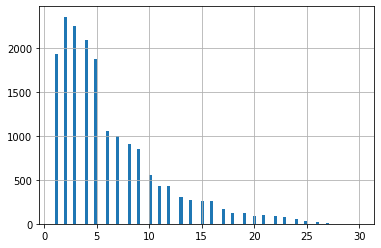

In [103]:
df['floor'].hist(bins=100,range=(1, 30))
(df['floor'].value_counts(normalize=True) * 100).head(5)

Наверное сказывается типовая советская застройка из 5ти этажек. Самый популярный этаж в объявлениях продажи это второй с 13% от числа, дальше идут лидеры но до 5 го а далее статистика рассыпается на маленькие отрезки
        * 2 этаж (13%)
        * 3 этаж (12%)
        * 4 этаж (11%)

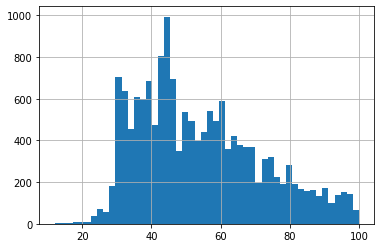

In [50]:
df_total = df.query('total_area < 100')
df_total['total_area'].hist(bins=50)


2    5737
1    5696
3    4612
4    1048
5     301
Name: rooms, dtype: int64

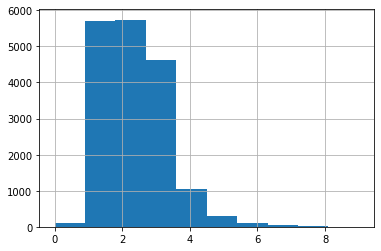

In [51]:
df_fl = df.query('rooms < 10')
df_fl['rooms'].hist(bins=10)

df['rooms'].value_counts().head()

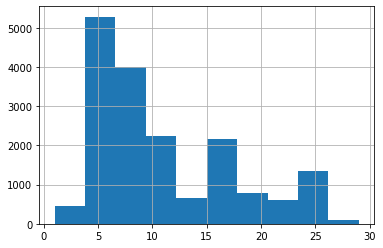

In [52]:
df_fl = df.query('floors_total < 30')
df_fl['floors_total'].hist(bins=10)

In [53]:
df['open_plan'].value_counts(normalize=True) * 100

False    99.790972
True      0.209028
Name: open_plan, dtype: float64

In [54]:
df['studio'].value_counts(normalize=True) * 100

False    99.502853
True      0.497147
Name: studio, dtype: float64

In [55]:
df['is_apartment'].value_counts(normalize=True) * 100

False    88.204056
True     11.795944
Name: is_apartment, dtype: float64

count    1.770100e+04
mean     7.708449e+06
std      1.234860e+07
min      1.219000e+04
25%      4.070000e+06
50%      5.300000e+06
75%      7.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


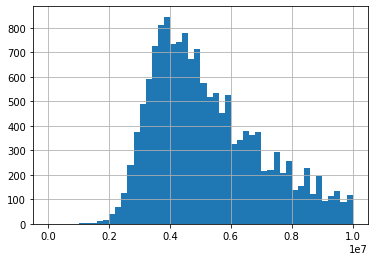

In [56]:
print(df['last_price'].describe())
df_price = df.query('last_price < 10000000')
df_price['last_price'].hist(bins=50)

#### Вывод

Самое популярное жилье на территории Санкт-Петербурга. Это 1-2-3х комнатная квартира в пятиэтажке в основном на 2-4 этаже площадью 30-45 кв. метров. Не студиа и не аппартаменты - исследование показало, что таких квартир очень мало.

Самая частая цена варируется от 3,5 до 5 млн. 

Чувствуется советское наследие и типовая застройка.

Все исследования были проведены с помощью гистограммы для всего датафрейма

## Срок процесса продажи

60    453
45    397
90    186
30    179
7     178
4     136
14    127
3     125
5     122
9     117
Name: days_exposition, dtype: int64

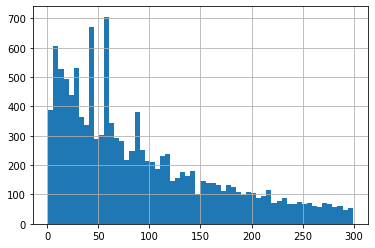

In [57]:
df_exposition = df.query('days_exposition < 300')
df_exposition['days_exposition'].hist(bins=60)
df_exposition['days_exposition'].value_counts().head(10)

На первое место приходят очень ровные цифры в виде 60, 45, 90, 30 дней. Мы не можем спросить разработчиков о работе базы данных которая собирает и сбрасывает объявления. Но на мой взгляд это может быть работа риелтовских агенств которые проверяют актуальность объявлений по круглым датам или работа самой системы, которая актуализирует данные по определенному сроку.

Что касается самого срока. То можно сказать, что чаще всего квартиры продаются в срок от 5 до 50 дней дальше график падает по экпоненте. Пики в виде уже упомянутых цифр учитывать мы не можем так как они не отражают равномерного распределения

### Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.

In [58]:
df['last_price'].max()

763000000.0

Ничего себе! Хотя, может квартира футболиста. Это уникальное предложение которое я уберу из выборки. Если бы у нас было исследование "рейтинг самых дорогих квартир России" то тогда бы она меня заинтересовала.

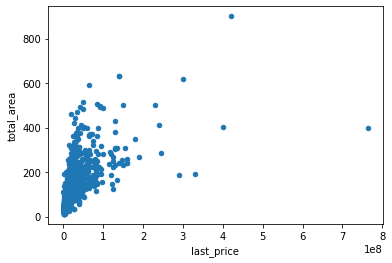

In [59]:
df.plot(x='last_price', y='total_area', kind='scatter')

Взял два важнейших и зависищих от себя параметра - цена и кол-во кв.метров. Мы видим, что нормальное распределение идет до 400 кв.м. и цены до 100 млн. Пожалуй все сто больше является черным лебедем и не нужно в массовой выборке.

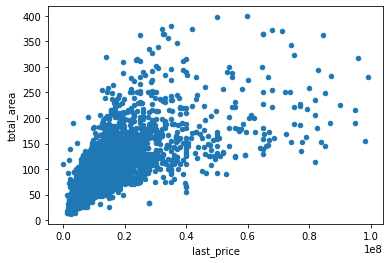

In [60]:
df_normal_price = df.query('last_price < 100000000 and total_area < 400')
df_normal_price.plot(x='last_price', y='total_area', kind='scatter')

Вот это уже интереснее
Посмотрим, что еще можно найти аномального

Может быть 20 балконов или 30 комнат? Можно проверить.

In [61]:
print(df['balcony'].sort_values(ascending=True).value_counts())

1    11090
2     3221
0     2954
5      238
4      139
3       59
Name: balcony, dtype: int64


Вполне нормальное распределение по количеству

In [62]:
print(df['rooms'].sort_values(ascending=False).value_counts())

2     5737
1     5696
3     4612
4     1048
5      301
0      114
6      103
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64


In [63]:
df_rooms = df.query('rooms == 0')
print(df_rooms[['rooms','studio']].reset_index().head(20))

    index  rooms  studio
0     440      0    True
1     508      0   False
2    1173      0    True
3    1174      0    True
4    1220      0    True
5    1277      0    True
6    1600      0    True
7    2270      0    True
8    2532      0   False
9    2563      0    True
10   2727      0    True
11   2991      0    True
12   3458      0    True
13   3896      0    True
14   4115      0   False
15   4319      0    True
16   4437      0   False
17   4683      0   False
18   4930      0    True
19   4955      0    True


С балконами вообще все в порядке 5 для меня вполне приемлимая цифра а вот с комнатами не так все гладко.
После 8ой комнаты квартиру я уже себе слабо представляю, но это может быть дом. 

In [64]:
df_house = df.query('rooms > 8')
print(df_house[['rooms','floors_total','total_area']])

       rooms  floors_total  total_area
648       11             7       183.7
866       14             5       363.0
4149      10             7       272.6
5358      15             6       590.0
8822       9             2       398.0
8860       9             6       235.0
9550       9             6       313.0
9688      11             5       194.1
13019      9             5       249.9
13397      9             5       309.7
14498     19             5       374.6
15151      9             2       400.0
16915      9             5       292.2
18119     10             5       216.1
18848     16             4       270.0
18891     10             6       290.0
19540     12            25       900.0
20791      9             5       250.0
20829     14             4       245.4


Придется убрать эти данные. Считаю их "черными лебедями" и в будущем стоит их отрезать.

In [65]:
df_normal = df.query('last_price < 100000000 and total_area < 400 and rooms < 8')

Выбросы существуют особенно по цене и площади. Это могут быть вполне себе правдивыми ситуациями, но для нашей выборки они будут только сбивать среднюю по выборке. 

### Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.

Для этого запросим отобраные географические позиции после самой основной (Санкт-Петербург)

In [66]:
df_localyty = df_normal.query('locality_name != "Санкт-Петербург"')
df_top10 = df_localyty['locality_name'].value_counts().head(10)
print(df_top10)

Пушкин               369
Колпино              337
посёлок Парголово    327
Петергоф             201
Сестрорецк           183
Красное Село         178
Ломоносов            133
Кронштадт             96
посёлок Стрельна      44
Павловск              38
Name: locality_name, dtype: int64


In [67]:
contry = ['Пушкин','Колпино','посёлок Парголово', 'Петергоф', 'Сестрорецк', 'Красное Село', 
                                          'Ломоносов', 'Кронштадт', 'посёлок Стрельна', 'Павловск']

df_top10 = df_localyty.query('locality_name in @contry')


columns_query = ['locality_name','last_price','total_area','floors_total','balcony','price_qmetr',
                    'ratio_kitchen','ratio_living']

df_localyty_data = df_localyty[columns_query].reset_index()


df_top10_data = df_localyty_data.pivot_table(index = 'locality_name', 
                                             values = ['price_qmetr','total_area'], aggfunc='mean')

print(df_top10_data.sort_values('price_qmetr',ascending=False))

                     price_qmetr  total_area
locality_name                               
Зеленогорск        115122.799198   54.487500
Пушкин             103125.819291   61.552791
Сестрорецк         101757.616875   63.366995
посёлок Парголово   90175.913458   51.521407
посёлок Стрельна    88691.933139   56.890909
Петергоф            84757.559690   51.727114
Павловск            84067.068077   58.697368
Кронштадт           79714.443253   52.347917
Колпино             75333.295801   52.358279
Ломоносов           72724.046741   51.181955
Красное Село        72148.588289   54.879775


Из таблицы видно, что самая большая средняя цена за квадратный метр в пригороде с названием "Зеленогорск" дальше идет не менее знаменитый город "Пушкин" хороший и очень тихий пригород Санкт-Петербурга и тройку заимыкает Сестрорецк по самой низкой цене за квадрат но самой большой средней площадью квартыры
            * Зеленогорск 115 тыс. и 54 кв.м
            * Пушкин 103 тыс. и 61 кв.м
            * Сестрорецк 101 тыс. и 63 кв.м

### Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.

Построим зависимости от количества комнат, общей площади квартиры и этажа на котором она находится. Сравнивать мы это будет по средней цене за квадратный метр - самой очевидной меры для продажи квартиры.

In [68]:
df_addiction = df_normal.pivot_table(index = 'rooms', 
                                             values = ['price_qmetr','total_area'], aggfunc='mean').reset_index()

#df_addiction['corr'] = df_addiction['price_qmetr'].corr(df_addiction['total_area'])
df_addiction['price_qmetr'] = round(df_addiction['price_qmetr'], 2)
df_addiction['total_area'] = round(df_addiction['total_area'], 2)

print(df_addiction.sort_values('price_qmetr',ascending=False))

   rooms  price_qmetr  total_area
0      0    121912.05       31.95
7      7    120893.54      217.01
6      6    120434.17      190.22
5      5    118539.28      156.77
4      4    113660.55      108.76
1      1    112726.52       38.09
2      2    109703.71       57.18
3      3    107628.79       79.57


Из таблицы видно для меня не самый очевидный вывод, самый дорогой квадратный метр в студии по соотношению к общей площади далее идут большие квартиры, ну еще бы скорее всего у них богатые хозяева которые делают очень хороший ремонт. Замыкает этот этот рейтиг квартиры от 1 до 3 комнат.

In [104]:
df_addiction = df_normal.pivot_table(index = ['rooms','last_first_floor'], 
                                             values = ['price_qmetr','total_area'], aggfunc='median')

df_addiction['price_qmetr'] = round(df_addiction['price_qmetr'], 2)
df_addiction['total_area'] = round(df_addiction['total_area'], 2)
#print(df_addiction.sort_values('price_qmetr',ascending=False))
print(df_addiction)

                        price_qmetr  total_area
rooms last_first_floor                         
0     first               114253.39       23.60
      last                124068.97       27.15
      middle              122222.22       27.30
1     first               100000.00       33.92
      last                105000.00       35.00
      middle              109696.98       37.78
      one_floor_build      88799.88       37.85
2     first                90670.58       50.00
      last                 96407.62       51.00
      middle              104343.08       55.00
      one_floor_build      68550.72       80.00
3     first                85245.90       67.40
      last                 93011.63       73.00
      middle               97435.90       76.00
      one_floor_build      87962.09       68.10
4     first                79996.50       87.00
      last                100000.00      105.15
      middle               98922.97      106.85
5     first                91223.78     

Видно, что больше всего ценятся этажи кроме первого и последнего, когда как из двух зол больше ценится последний на первом самая дешевая медианная цена за квадратный метр.

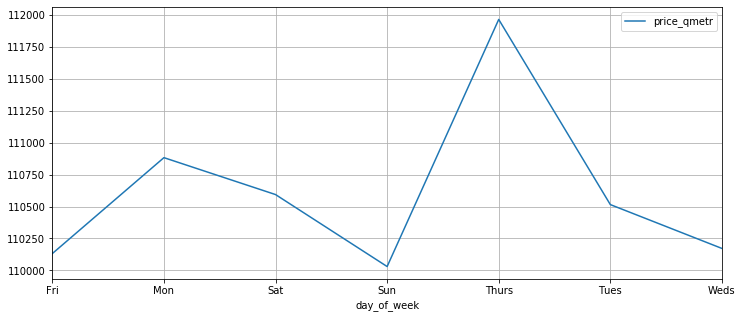

In [70]:
df_week_day = df_normal.pivot_table(index = ['day_of_week'], 
                                             values = ['price_qmetr'], aggfunc='mean')


df_week_day.plot(grid=True, figsize=(12, 5))

График на самом деле не совсем отображает действительность так как мы не знаем в какой день люди меняли цену, но все ровно если предположить, что цена на квартиры менятеся в процессе продажи редко. можно сказать, что виднеется цикл как чена возрастает в понедельник и по снисхоидельной падает в к концу недели имея небольшой пик перед выходными.

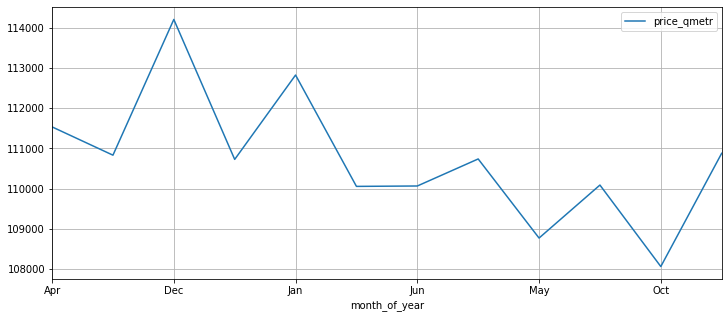

In [71]:
df_week_day = df_normal.pivot_table(index = ['month_of_year'], 
                                             values = ['price_qmetr'], aggfunc='mean')


df_week_day.plot(grid=True, figsize=(12, 5))

Очень и инетересный для жизни график. В нем видно, что цикл по падению идет с декабря. В России есть устойчивое привычка год начинать с подхема цены так как непонятно, что будет в течене всего года. Так и тут видно, что самая высокая цена за квадратный метр находится в начале года и падает в течение года.

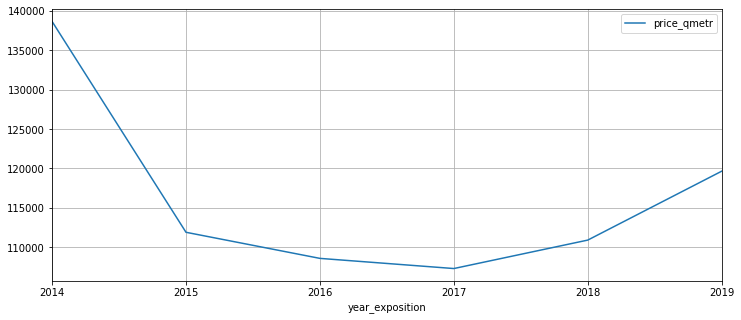

In [72]:
df_week_day = df_normal.pivot_table(index = ['year_exposition'], 
                                             values = ['price_qmetr'], aggfunc='mean')


df_week_day.plot(grid=True, figsize=(12, 5))

Как факт тут констатируем присоединение Крыма и кризис после этих событий.

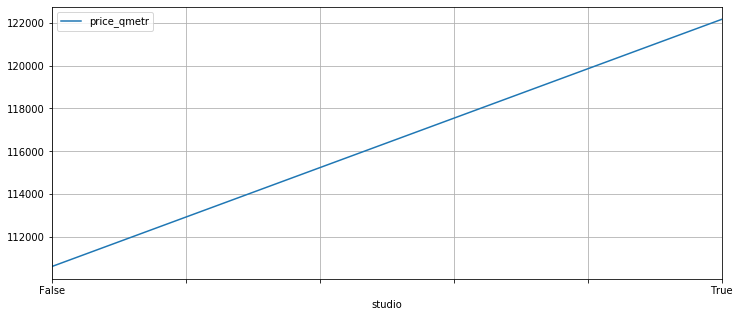

In [73]:
df_studio = df_normal.pivot_table(index = ['studio'], 
                                             values = ['price_qmetr'], aggfunc='mean')
df_studio.plot(grid=True, figsize=(12, 5))

Цена за квардратный метр студии чаще всего выше на 10-15 процентов. Это странный тренд так как европейская действительность немного иная. Можно предположить, что студии это чаще всего квартиры в новых домах на высоких этажах и панарамным видом. в остальных случаях это просто присоединеный тренд к выше описанным факторам.

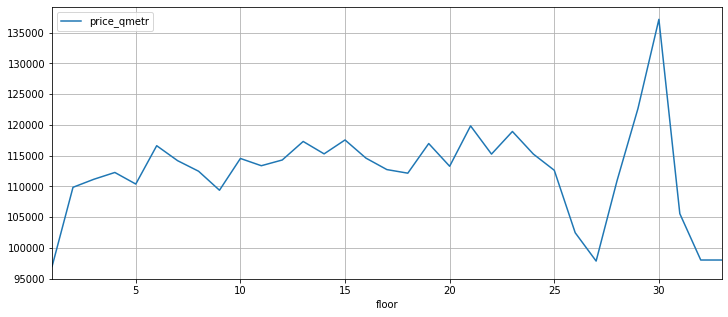

In [74]:
df_floor = df_normal.pivot_table(index = ['floor'], 
                                             values = ['price_qmetr'], aggfunc='mean')
df_floor.plot(grid=True, figsize=(12, 5))

Этаж очевиден. Людям важно, чтобы не первый и не последний а в остальном все ровно до домов с панарамным видом о 30 этажа а дальше график проваливается ниже тренда. И скорее всего это Особенности данной выборки. Это ненормальный пик в рамках данных параметров.

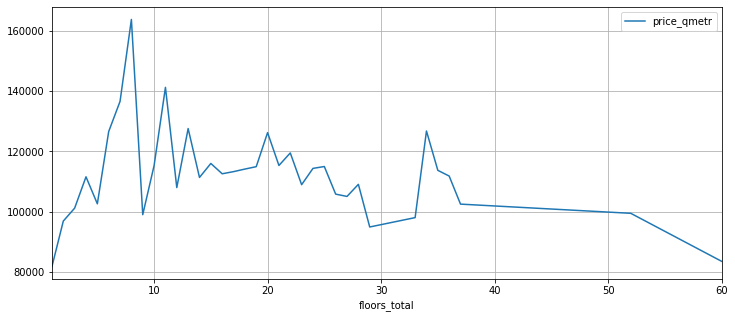

In [75]:
df_floors_total = df_normal.pivot_table(index = ['floors_total'], 
                                             values = ['price_qmetr'], aggfunc='mean')
df_floors_total.plot(grid=True, figsize=(12, 5))

Здесь можно петь песню "Панелька" Хаски
5 и 8 этажей, первые хрущевки вторые восьмиэтажки 80 годов. Бум производства типового жилья.

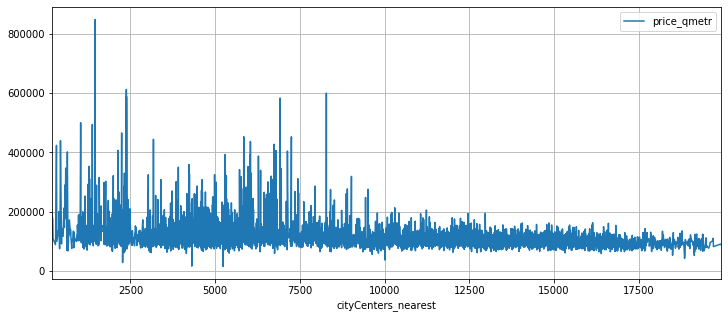

In [76]:
df_normal_centr = df_normal.query('cityCenters_nearest < 20000')
df_city_centr = df_normal_centr.pivot_table(index = ['cityCenters_nearest'], 
                                             values = ['price_qmetr'], aggfunc='mean')
df_city_centr.plot(grid=True, figsize=(12, 5))

Нормальное рапределение. Но интересно, что после 2.5 км график просидает а в самом центре очень большой разброс от наибольшей до цены от 15 км. от центра. В центре очень старый фонд и если он отремонтирован ото очень дорогой а если это то что продается из старейшей общаги. Самое нормальное распределение на 4 км от центра. Корреляция к этому растоянию наиболее предсказуема по отношению к цене квадратного метра.

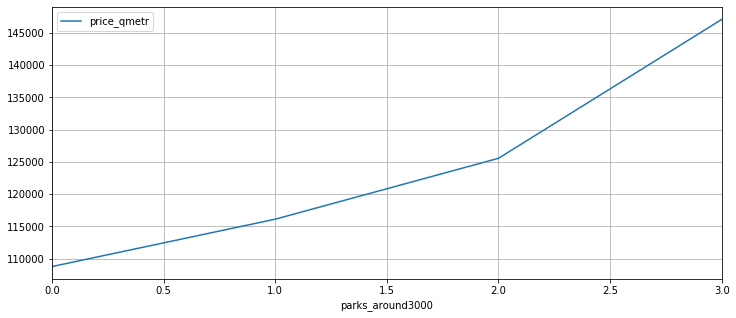

In [77]:
df_city_centr = df_normal_centr.pivot_table(index = ['parks_around3000'], 
                                             values = ['price_qmetr'], aggfunc='mean')
df_city_centr.plot(grid=True, figsize=(12, 5))

Тут ничего удивительного, чем зеленее район чем больше в нем есть воды тем большая цена за квадратный метр.

## Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.

Для данного исследования я использовал функцию которая выделяет из датафрейма групповые поля с выборкой больше 1000 записей. 
Для удобного восприятия отношения между этими столбцами использую plot. 

Удаленность от центра я определяю цифрой 5 км. которая показалась из предидущего исследования. Когда после 5 км цена по отношению удаленности падала.

In [78]:
def more_1000_object(segment, df_func):
    
    more_1000 = []
    
    for name, group_df in df_func.groupby(segment):
        
        if len(group_df) >= 1000:
            more_1000.append(name)
        
    return more_1000
        

In [79]:
MORE1000_OBJECT_rooms = more_1000_object('rooms', df_normal)

df_more1000 = df_normal.query('rooms in @MORE1000_OBJECT_rooms').reset_index()

df_more1000['centr'] = df_more1000['cityCenters_nearest'].apply( lambda x : 'centr' if x < 5000 else 'suburb')

green is centr
red is suburb


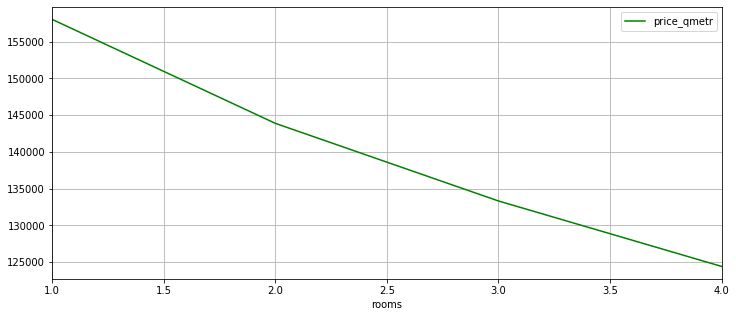

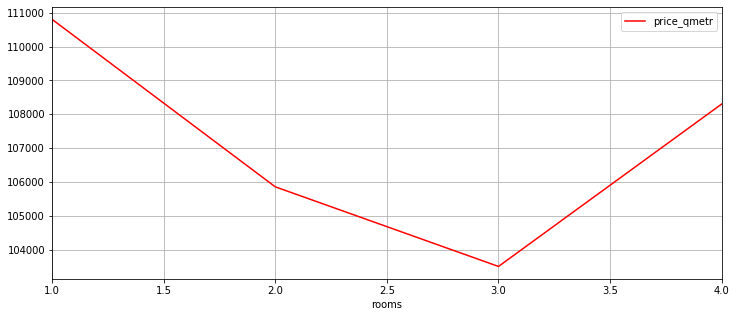

In [80]:
df_near_centr_rooms_pt = df_more1000.query('centr == "centr"').pivot_table(index = ['rooms'], 
                                             values = ['price_qmetr'], aggfunc='mean')

df_near_centr_rooms_pt.plot(grid=True, figsize=(12, 5), color = 'green')

df_near_centr_rooms = df_more1000.query('centr != "centr"').pivot_table(index = ['rooms'], 
                                             values = ['price_qmetr'], aggfunc='mean')

df_near_centr_rooms.plot(grid=True, figsize=(12, 5), color = 'red')

print('green is centr')
print('red is suburb')

Соотношение средней цены за квадратный метр по отношению к количеству комнат.
Интересен график тем, что мы видим, что маленькие квартиры больше в почете у житей центра а дальше график сходит вниз. Однакомнатная квартира это вход в владельцев недвижимости в центре и он всегда был дорогой.

Что касается пригорода то тут видна тоже интересная ситуация. График так же сходит вниз но до 3 комнатной квартиры а дальше цена за квадртаный метр повышается.

In [81]:
df_normal_copy = df_normal.copy()
df_normal_copy['to_centr_km'] = df_normal_copy['cityCenters_nearest'] // 1000

MORE1000_OBJECT_to_centr = more_1000_object('to_centr_km',df_normal_copy)

df_more1000_tocentr = df_normal_copy.query('to_centr_km in @MORE1000_OBJECT_to_centr').reset_index()
df_more1000_tocentr['centr'] = df_more1000_tocentr['cityCenters_nearest'].apply( lambda x : 'centr' if x < 5000 else 'suburb')

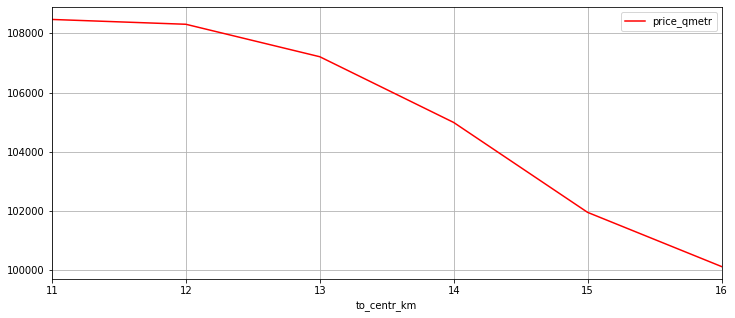

In [82]:
df_near_centr_tocentr_pt = df_more1000_tocentr.query('centr == "suburb"').pivot_table(index = ['to_centr_km'], 
                                             values = 'price_qmetr', aggfunc='mean')

df_near_centr_tocentr_pt.plot(grid=True, figsize=(12, 5), color = 'red')

Интересно то, что мы не нашли 1000 выборку квартир которые есть в центре, что тоже является результатом исследования. Из этого мы можем сделать вывод, что недвижимости на продажу в центре не так много в силу разных причин.

ну а что касается тренда цены за квадратный метр она очевидно падает вниз чем объект дальше от центра.

In [83]:
df_normal_copy = df_normal.copy()
df_normal_copy['group_area'] = df_normal_copy['total_area'] // 10

MORE1000_OBJECT_to_grarea = more_1000_object('group_area',df_normal_copy)

df_more1000_grarea = df_normal_copy.query('group_area in @MORE1000_OBJECT_to_grarea').reset_index()
df_more1000_grarea['centr'] = df_more1000_grarea['cityCenters_nearest'].apply( lambda x : 'centr' if x < 5000 else 'suburb')

green is centr
red is suburb


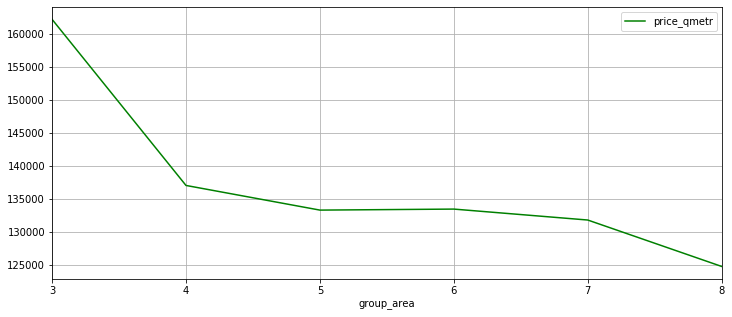

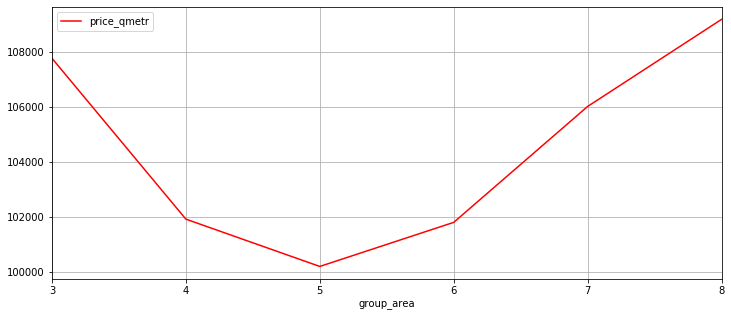

In [84]:
df_near_centr_grarea_pt = df_more1000_grarea.query('centr == "centr"').pivot_table(index = ['group_area'], 
                                             values = 'price_qmetr', aggfunc='mean')

df_near_centr_grarea_pt.plot(grid=True, figsize=(12, 5), color = 'green')

df_near_centr_grarea = df_more1000_grarea.query('centr == "suburb"').pivot_table(index = ['group_area'], 
                                             values = 'price_qmetr', aggfunc='mean')

df_near_centr_grarea.plot(grid=True, figsize=(12, 5), color = 'red')

print('green is centr')
print('red is suburb')

В центре очевидно самое большое число квартир с общенй площадью от 30 до 40 кв. еще бы это во первых старый фонд в вторых их очень выгодно продавать они самые дорогие как показало исследование выше. 

Пригород так же падает в цене до 50 кв. дальше начинает рости до 80 кв. 

## Корреляция

In [85]:
def corr_for_df(df_func,col_1,col_2):
    return df_func[col_1].corr(df_func[col_2])


In [86]:
print('Корреляция между столбцом {0} и столбцом {1} в основном датафрейме'.format('total_area', 'last_price'),  
                                                                corr_for_df(df_normal,'total_area','last_price'))

print('Корреляция между столбцом {0} и столбцом {1} в 1000 выборке'.format('total_area', 'last_price'),  
                                                                corr_for_df(df_more1000,'total_area','last_price'))


Корреляция между столбцом total_area и столбцом last_price в основном датафрейме 0.7710764556391965
Корреляция между столбцом total_area и столбцом last_price в 1000 выборке 0.7560717617022796


In [87]:
print('Корреляция между столбцом {0} и столбцом {1} в основном датафрейме'.format('living_area', 'last_price'),  
                                                                corr_for_df(df_normal,'living_area','last_price'))

print('Корреляция между столбцом {0} и столбцом {1} в 1000 выборке'.format('living_area', 'last_price'),  
                                                                corr_for_df(df_more1000,'living_area','last_price'))

Корреляция между столбцом living_area и столбцом last_price в основном датафрейме 0.6319716317379355
Корреляция между столбцом living_area и столбцом last_price в 1000 выборке 0.5955876663201218


In [88]:
print('Корреляция между столбцом {0} и столбцом {1} в основном датафрейме'.format('cityCenters_nearest', 'price_qmetr'),  
                                                        corr_for_df(df_normal,'cityCenters_nearest','price_qmetr'))

print('Корреляция между столбцом {0} и столбцом {1} в 1000 выборке'.format('cityCenters_nearest', 'price_qmetr'),  
                                                        corr_for_df(df_more1000,'cityCenters_nearest','price_qmetr'))

Корреляция между столбцом cityCenters_nearest и столбцом price_qmetr в основном датафрейме -0.34117755478474393
Корреляция между столбцом cityCenters_nearest и столбцом price_qmetr в 1000 выборке -0.34603570348353846


In [89]:
print('Корреляция между столбцом {0} и столбцом {1} в основном датафрейме'.format('rooms', 'price_qmetr'),  
                                                                  corr_for_df(df_normal,'rooms','price_qmetr'))

print('Корреляция между столбцом {0} и столбцом {1} в 1000 выборке'.format('rooms', 'price_qmetr'),  
                                                                corr_for_df(df_more1000,'rooms','price_qmetr'))

Корреляция между столбцом rooms и столбцом price_qmetr в основном датафрейме -0.011748401359696849
Корреляция между столбцом rooms и столбцом price_qmetr в 1000 выборке -0.03021607002865726


Корреляцию я сделал с помощью функции которая возвращает двецифры для основного датафрейма и выборочного из исследования про количество комнат. 

Тут как я могу понять, что важно исследования а что не так. Допустим значения с минусом говорят о том, что в этих колонках есть множество факторов которые влияют на соотношения объекта и цены. 

Допустим мы можем с увереностью сказать, что цена за квадрат зависит от плащади, а что цена зависит от количества комнат мы не может, там очень много факторов которые могут повлиять на окончательную цену.

## Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.

Исследование проведено инструментам pivot_table и plot с отбором по нужным столбикам конструкцией query() .
Соотношение было рпссмотренно слиянием таблиц конструкцией merge по левому соединению к большей выборке.

       cityCenters_nearest    price_qmetr  total_area
rooms                                                
0                   8087.5  107235.854675        26.1
1                  13956.0  108858.603066        38.0
2                  12543.0  100672.645740        54.5
3                  12456.0   93506.493506        75.0
4                   7103.0   99680.948040       104.0
5                   4807.0   95238.853503       149.0
6                   3405.0   83777.608530       151.8
7                   4883.5  103516.534700       148.0


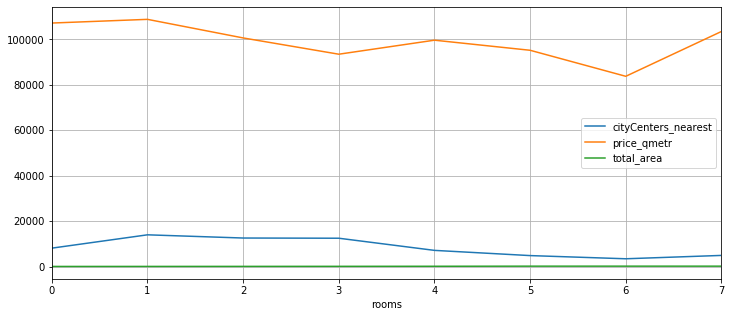

In [90]:
df_normal_apart_price = df_normal.query('is_apartment').pivot_table(index = ['rooms'], 
                                values = ['total_area', 'price_qmetr', 'cityCenters_nearest'],aggfunc='median' )

print(df_normal_apart_price)
df_normal_apart_price.plot(grid=True, figsize=(12, 5))

из маленькой выборке можно сказать, что пик по цене в коммерческих квартирах от 1 - до 3 комнат. Это можно легко объяснить тем, что такие квартиры нужна для того чтобы их сдавать а это самое распространненая категория. Дальше цена очень сильно падает это говорит тем, что такие квартиры неликвидны на рынке аренды.

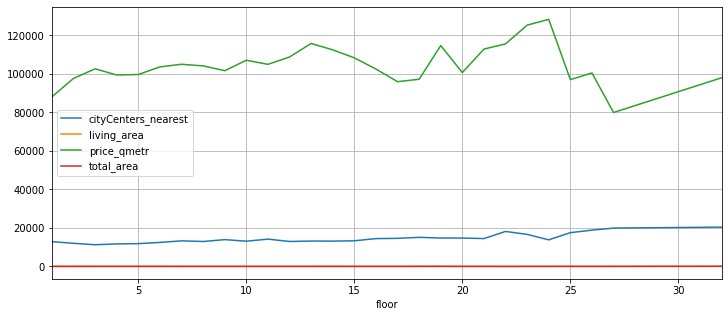

In [91]:
df_normal_apart_floor = df_normal.query('is_apartment').pivot_table(index = ['floor'], 
                             values = ['total_area', 'living_area', 'price_qmetr', 'cityCenters_nearest'],aggfunc='median' )

df_normal_apart_floor.plot(grid=True, figsize=(12, 5))



От этажа цена аппартаментов не сильно зависит.

       cityCenters_nearest  living_area    price_qmetr  total_area
rooms                                                             
0                  13576.0         18.7  122222.222222       27.11
1                  14640.0         19.0  107692.307692       28.00


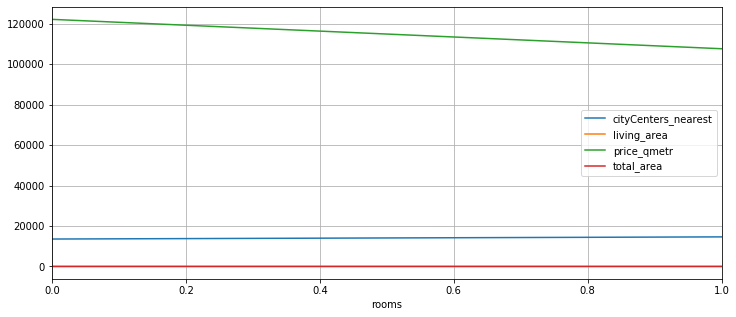

In [92]:
df_normal_apart = df_normal.query('studio').pivot_table(index = ['rooms'], 
                                values = ['total_area', 'living_area', 'price_qmetr', 'cityCenters_nearest'],aggfunc='median' )

print(df_normal_apart)
df_normal_apart.plot(grid=True, figsize=(12, 5))

Очень маленькая выборка, для того чтобы хоть, что-то скзать с увереностью. С увереностью можно сказать только то что при возрастание площади цена за кв. м. падает. Но это общий тренд.

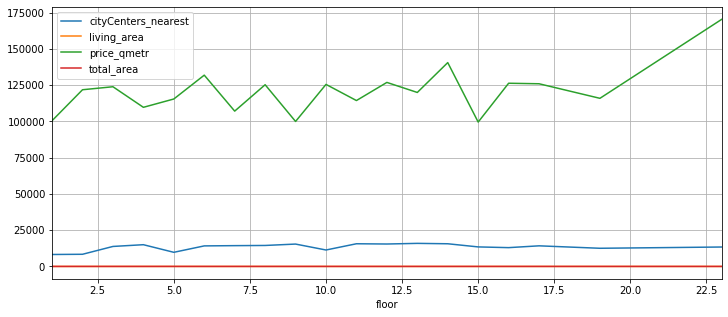

In [93]:
df_normal_apart_floor = df_normal.query('studio').pivot_table(index = ['floor'], 
                             values = ['total_area', 'living_area', 'price_qmetr', 'cityCenters_nearest'],aggfunc='median' )

df_normal_apart_floor.plot(grid=True, figsize=(12, 5))

А вот чем больше этаж на котором расположена студия тем дороже цена за кв.м.

       cityCenters_nearest  living_area    price_qmetr  total_area
rooms                                                             
0                  13222.0         19.0  120879.120879       27.30
1                  13186.5         23.7  116591.251885       41.60
3                  18113.5         42.8   76449.218237       61.75
4                   4811.0         71.3  123456.790123       97.20
5                   7101.0         29.9  310592.356688      157.00


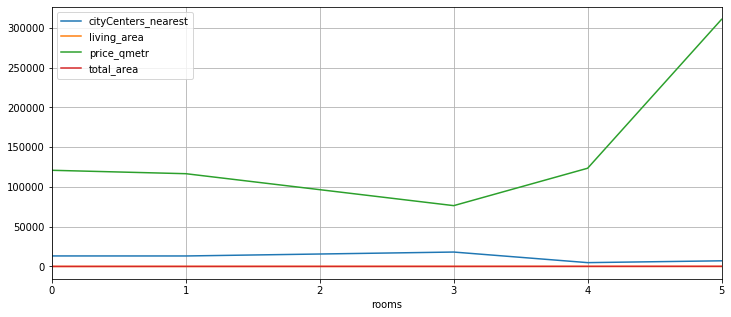

In [94]:
df_normal_apart = df_normal.query('open_plan').pivot_table(index = ['rooms'], 
                                values = ['total_area', 'living_area', 'price_qmetr', 'cityCenters_nearest'],aggfunc='median' )

print(df_normal_apart)
df_normal_apart.plot(grid=True, figsize=(12, 5))

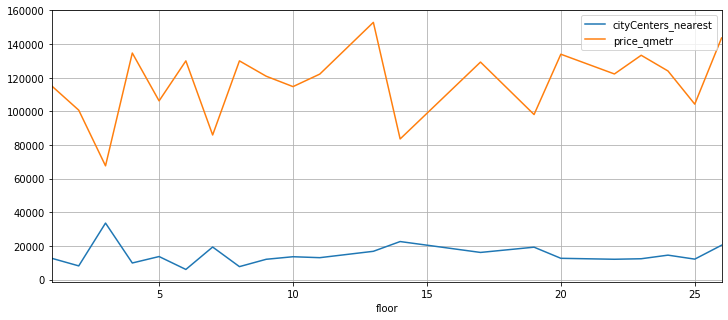

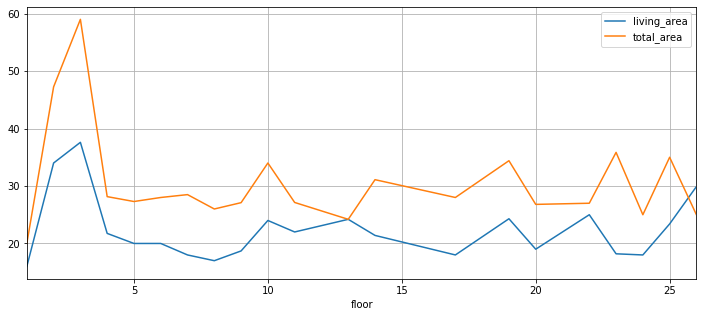

In [95]:
df_normal_apart_floor_price = df_normal.query('open_plan').pivot_table(index = ['floor'], 
                             values = ['price_qmetr', 'cityCenters_nearest'],aggfunc='median' )

df_normal_apart_floor_price.plot(grid=True, figsize=(12, 5))

df_normal_apart_floor_area = df_normal.query('open_plan').pivot_table(index = ['floor'], 
                                         values = ['total_area', 'living_area'],aggfunc='median' )

df_normal_apart_floor_area.plot(grid=True, figsize=(12, 5))

#### Представитель типовой квартиры

   rooms  city_cent_flat  price_qmetr_flat  city_cent_apart  price_qmetr_apart
0      1         14073.0     108062.108811          13956.0      108858.603066
1      2         12856.0     101866.251944          12543.0      100672.645740
2      3         12548.0      95703.125000          12456.0       93506.493506
3      4          8460.0      96709.677419           7103.0       99680.948040
4      5          4780.5     100000.000000           4807.0       95238.853503


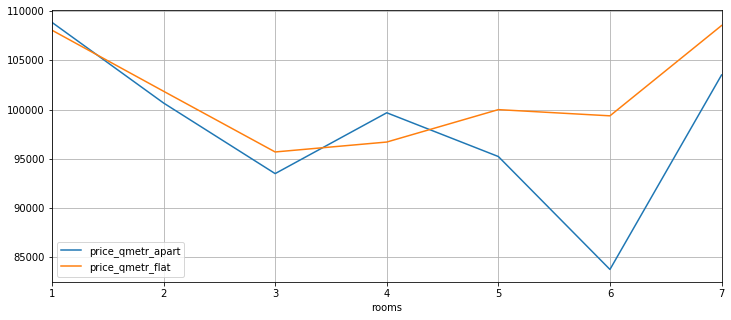

In [96]:
df_normal_flat_rooms_price = df_normal.query('not open_plan and not studio and not is_apartment').pivot_table(
                    index = ['rooms'],values = ['price_qmetr', 'cityCenters_nearest'],aggfunc='median' ).reset_index()

df_normal_apart_rooms_price = df_normal.query('is_apartment').pivot_table(
                    index = ['rooms'],values = ['price_qmetr', 'cityCenters_nearest'],aggfunc='median' ).reset_index()


data_ratio = df_normal_flat_rooms_price.merge(df_normal_apart_rooms_price, on='rooms', how='left')

columns_ = ['rooms','city_cent_flat', 'price_qmetr_flat', 'city_cent_apart', 'price_qmetr_apart']
data_ratio.columns = columns_

print(data_ratio.head())

data_ratio_plot = data_ratio.pivot_table(index = ['rooms'], 
                                         values = ['price_qmetr_flat', 'price_qmetr_apart'],aggfunc='mean' )

data_ratio_plot.plot(grid=True, figsize=(12, 5))

   floor  city_cent_flat  price_qmetr_flat  city_cent_studio  \
0      1         13051.0      91491.069294            8264.0   
1      2         12032.0     100909.090909            8409.0   
2      3         12067.0     102045.454545           13808.0   
3      4         12082.0     101764.705882           15015.0   
4      5         12450.5      99655.956591            9766.0   

   price_qmetr_studio  
0       100543.478261  
1       121875.000000  
2       123945.347680  
3       109756.097561  
4       115492.957746  


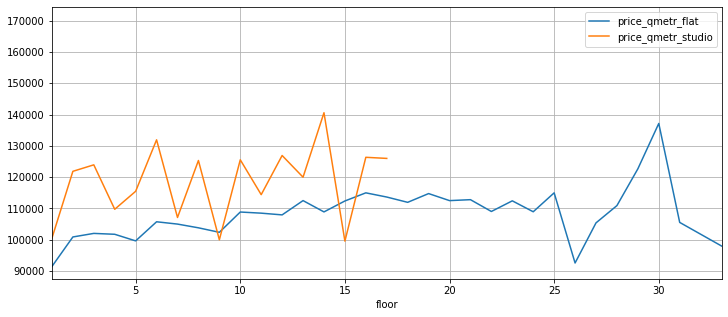

In [97]:
df_normal_flat_rooms_price = df_normal.query('not open_plan and not studio and not is_apartment').pivot_table(
                    index = ['floor'],values = ['price_qmetr', 'cityCenters_nearest'],aggfunc='median' ).reset_index()

df_normal_apart_rooms_price = df_normal.query('studio').pivot_table(
                    index = ['floor'],values = ['price_qmetr', 'cityCenters_nearest'],aggfunc='median' ).reset_index()

data_ratio = df_normal_flat_rooms_price.merge(df_normal_apart_rooms_price, on='floor', how='left')

columns_ = ['floor','city_cent_flat', 'price_qmetr_flat', 'city_cent_studio', 'price_qmetr_studio']
data_ratio.columns = columns_

print(data_ratio.head())

data_ratio_plot = data_ratio.pivot_table(index = ['floor'], 
                                         values = ['price_qmetr_flat', 'price_qmetr_studio'],aggfunc='mean' )

data_ratio_plot.plot(grid=True, figsize=(12, 5))

   rooms  city_cent_flat  price_qmetr_flat  city_cent_open_plan  \
0      1         14073.0     108062.108811              13186.5   
1      2         12856.0     101866.251944                  NaN   
2      3         12548.0      95703.125000              18113.5   
3      4          8460.0      96709.677419               4811.0   
4      5          4780.5     100000.000000               7101.0   

   price_qmetr_open_plan  
0          116591.251885  
1                    NaN  
2           76449.218237  
3          123456.790123  
4          310592.356688  


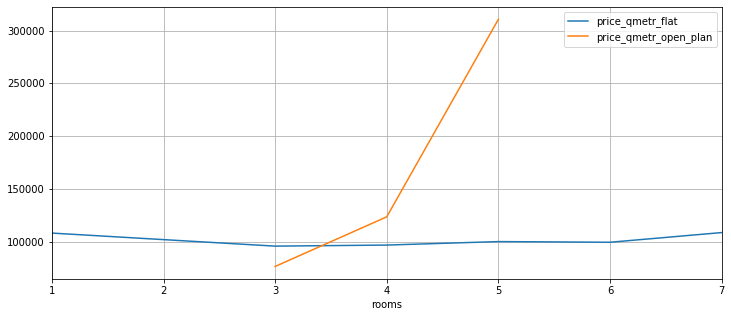

In [98]:
df_normal_flat_rooms_price = df_normal.query('not open_plan and not studio and not is_apartment').pivot_table(
                    index = ['rooms'],values = ['price_qmetr', 'cityCenters_nearest'],aggfunc='median' ).reset_index()

df_normal_apart_rooms_price = df_normal.query('open_plan').pivot_table(
                    index = ['rooms'],values = ['price_qmetr', 'cityCenters_nearest'],aggfunc='median' ).reset_index()


data_ratio = df_normal_flat_rooms_price.merge(df_normal_apart_rooms_price, on='rooms', how='left')

columns_ = ['rooms','city_cent_flat', 'price_qmetr_flat', 'city_cent_open_plan', 'price_qmetr_open_plan']
data_ratio.columns = columns_

print(data_ratio.head())

data_ratio_plot = data_ratio.pivot_table(index = ['rooms'], 
                                         values = ['price_qmetr_flat', 'price_qmetr_open_plan'],aggfunc='mean' )

data_ratio_plot.plot(grid=True, figsize=(12, 5))

# общий вывод

У нас многосторонее исследование. К обобщающим тезисам можно сказть, что рынок недвижимости Санкт-Петербурга в большей своей части подчиняется общим законам рынка с некторыми интересными моментами которые приходят с новыми тенденциями строительства объектов как "свободная планировка" или квартира-студия.

В большей части мы имеем все тот же фонд заложеный за прошлое 40 лет. Это пяти или восьми этажные дома с регулярной планировкой где больше всего 1 или 2 комнатных квартир от 30 до 50 кв.м. Средняя стоимость квадрата начинается от 60 тыс. руб.  Первый и последний этаж выбирают реже от чего и цена на них ниже. 

Тенденция по удаленносит от центра говорят, что человеку важно когда квартира в центре удаляется от оного до 5 км. а после 5 цена опять возрастает какбы обнуляясь и нисходит по более плавной парабале.

Студии, Свободная планировка и аппартаменты иммеют свои очень интересные особенности в виде того, что аппартаменты очень сильно дешевеют от 3 комнат и более, Цена стодии сильно возрастает в зависимости от этажа и панарамного вида, а цена за квадрат свободной планировки очень сильно вырастает в зависимости от общей площади объекта. 
